<h1>MLP genérica usada para porta XOR</h1>

Aluno: Wallace Ketler Melo de Morais

Devemos ter apenas 1 saída e 1 camadas oculta, além de $x$ entradas. Para cada camada oculta devemos ter $y$ neurônios

![image.png](
  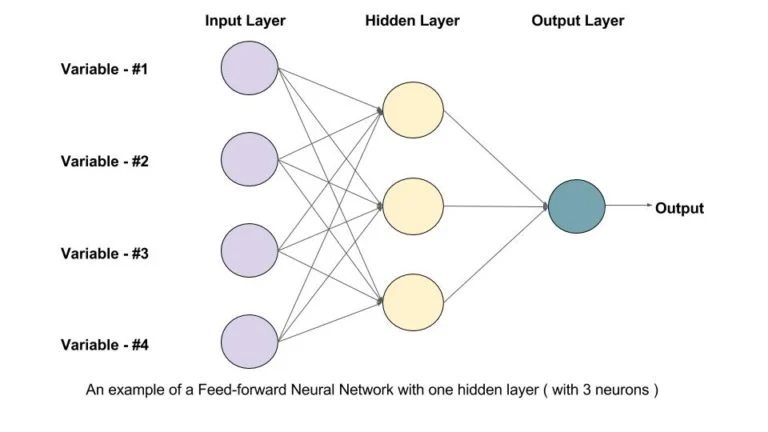)

In [ ]:
import random
import math

def degrau(soma):
  if(soma>0.5):
    saida = 1
    return saida
  else:
    saida = 0
    return saida

#Define a quantidade de entrada e a quantidade de neurônios da camada oculta
qtd_entradas = input("Digite a quantidade de entradas: ")
qtd_entradas = int(qtd_entradas)
qtd_neuronios_camada_oculta = input("Digite a quantidade de neurônios para a camada oculta: ")
qtd_neuronios_camada_oculta = int(qtd_neuronios_camada_oculta)
#Define a taxa de aprendizagem, quantida de épocas e erro
alfa = 0.3
epocas = 10000
#Define as possíveis entradas e a saída desejada
entradas = [[0,0,-1] , [0,1,-1] , [1,0,-1] , [1,1,-1]]
esperado =    [0,       1,      1,     0    ]
#Define BIAS de neurônios na última posição das entradas e variável auxiliar bias
bias = -1
#Inicializa os pesos
pesos_entrada_camada_oculta = [[0 for i in range(qtd_entradas+1)] for j in range(qtd_neuronios_camada_oculta)]
pesos_camada_oculta_saida   = [0 for i in range(qtd_neuronios_camada_oculta+1)]
print(pesos_entrada_camada_oculta)
print(pesos_camada_oculta_saida)



Digite a quantidade de entradas: 2
Digite a quantidade de neurônios para a camada oculta: 10
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Mostrando pesos aleatórios devidamente colocados

In [ ]:
#Gera pesos aleatorios inicialmente
for i in range(qtd_neuronios_camada_oculta):
  for j in range(qtd_entradas+1):
    pesos_entrada_camada_oculta[i][j] = random.uniform(0.2,0.7)
for i in range(qtd_neuronios_camada_oculta+1):
  pesos_camada_oculta_saida[i] = random.uniform(0.2,0.7)


Aplica Backpropagation

- Calcula saídas da camada oculta por meio da equação abaixo e da aplicação da função degrau:

\begin{equation}
  saída = \sum pesos \cdot entradas
\end{equation}

- Calcula a saída final por meio da mesma equação acima
- Calcula erro da saída por meio de:

\begin{equation}
  erro = esperado - real
\end{equation}

- Calcula o Δ do neurônio da saída
- Utiliza o cálculo do Δ da saída para calcular os demais deltas
- Usando tais Δ os pesos são recalculados a fim das entradas multiplicadas por estes pesos produzirem as saídas desejadas.
- Para quando atingir todos os acertos, ou seja, $tolerância = 0$.



In [ ]:
acertos = 0
numero_epocas = 0
numero_epocas = 0
deltas_oculta = [0 for i in range(qtd_neuronios_camada_oculta)]
saidas_oculta_u = [0 for i in range(qtd_neuronios_camada_oculta)]

delta_saida = 0
saida_u = 0
saida_i = 0
erro_amostra = 0
func_erro_amostra = 0

while(numero_epocas < epocas and acertos != len(entradas)):
  acertos = 0
  print("ÉPOCA: " + str(numero_epocas+1))
  #calculando saída da camada oculta
  for a in range(len(entradas)): #número de amostras de entrada
    print("Saída esperada: " + str(esperado[a]))
    saidas_oculta_i = []
    saidas_oculta_u = [0 for i in range(qtd_neuronios_camada_oculta)]
    saida_u = 0
    saida_i = 0
    print("AMOSTRA: " + str(a+1))
    print(entradas[a])
    for i in range(qtd_neuronios_camada_oculta):
      for j in range(qtd_entradas+1):
          saidas_oculta_u[i] += pesos_entrada_camada_oculta[i][j] * entradas[a][j] 
    #Cada amostra desta época possuirá uma saída
    #Aplicando limiar nas saídas u para virar i
    for i in range(qtd_neuronios_camada_oculta):
      saidas_oculta_i.append(degrau(saidas_oculta_u[i]))
    saidas_oculta_i.append(bias) #adiciona entra do bias
    print("Saída oculta")
    print(saidas_oculta_i)
    #Calculando saída na camada de saída
    for i in range(qtd_neuronios_camada_oculta+1):
      saida_u += saidas_oculta_i[i] * pesos_camada_oculta_saida[i]
    saida_i = degrau(saida_u)
    print("Saída real: " + str(saida_u))
    print("Saída amostra: " + str(saida_i))
    #CALCULANDO DELTA DA SAÍDA PARA COMEÇAR A CORRIGIR OS ERROS
    erro_amostra = esperado[a] - saida_i     #ok
    #verifica se acertou nesta amostra
    if(erro_amostra == 0):
      acertos +=1
    #print("ERRO: " +str(erro_amostra))
    func_erro_amostra = (1/(math.cosh(saida_u)))  #ok
    delta_saida = (erro_amostra) * (func_erro_amostra*func_erro_amostra) #ok 
    #corrigindo os pesos da saída
    for i in range(qtd_neuronios_camada_oculta+1):
      pesos_camada_oculta_saida[i] += (alfa*delta_saida*saidas_oculta_i[i])
    #calculando delta dos neurônios da camada oculta
    for i in range(qtd_neuronios_camada_oculta):
      deltas_oculta[i] = (delta_saida * pesos_camada_oculta_saida[i] )*(1/math.cosh(saidas_oculta_u[i]))*(1/math.cosh(saidas_oculta_u[i]))
    #corrigindo os pesos da oculta
    for i in range(qtd_neuronios_camada_oculta):
      for j in range(qtd_entradas+1):
        pesos_entrada_camada_oculta[i][j] += (alfa*deltas_oculta[i]*entradas[a][j])
    print("**************")
  numero_epocas += 1
  print("-----------------------------------------------------")

A saída de streaming foi truncada nas últimas 5000 linhas.
**************
-----------------------------------------------------
ÉPOCA: 170
Saída esperada: 0
AMOSTRA: 1
[0, 0, -1]
Saída oculta
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
Saída real: -0.03413655905442369
Saída amostra: 0
**************
Saída esperada: 1
AMOSTRA: 2
[0, 1, -1]
Saída oculta
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1]
Saída real: 1.801608312219333
Saída amostra: 1
**************
Saída esperada: 1
AMOSTRA: 3
[1, 0, -1]
Saída oculta
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1]
Saída real: 0.8008307878409241
Saída amostra: 1
**************
Saída esperada: 0
AMOSTRA: 4
[1, 1, -1]
Saída oculta
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, -1]
Saída real: 4.1493047931767455
Saída amostra: 1
**************
-----------------------------------------------------
ÉPOCA: 171
Saída esperada: 0
AMOSTRA: 1
[0, 0, -1]
Saída oculta
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
Saída real: -0.034435045602011556
Saída amostra: 0
**************
Saída esperada: 1
AMOSTRA: 2
[0, 1, -

Análise Estatística

Utilizando o mesmo algoritmo executado anteriormente, serão feitas 10 repetidas execuções com o objetivo de verificarmos a porcentagem de execuções convergem corretamente para o resultado desejado:

In [ ]:
epocas = 10000
iteracao_estatistica = 0
qtd_epocas_para_convergir = []

while(iteracao_estatistica < 10): #Usado para verificar o desempenho

  acertos = 0
  numero_epocas = 0
  numero_epocas = 0
  deltas_oculta = [0 for i in range(qtd_neuronios_camada_oculta)]
  saidas_oculta_u = [0 for i in range(qtd_neuronios_camada_oculta)]
  #Gera pesos aleatorios inicialmente
  for i in range(qtd_neuronios_camada_oculta):
    for j in range(qtd_entradas+1):
      pesos_entrada_camada_oculta[i][j] = random.uniform(-0.5,0.5)
  for i in range(qtd_neuronios_camada_oculta+1):
    pesos_camada_oculta_saida[i] = random.uniform(-0.5,0.5)

  delta_saida = 0
  saida_u = 0
  saida_i = 0
  erro_amostra = 0
  func_erro_amostra = 0

  while(numero_epocas < epocas and acertos != len(entradas)):
    acertos = 0
    #calculando saída da camada oculta
    for a in range(len(entradas)): #número de amostras de entrada
      saidas_oculta_i = []
      saidas_oculta_u = [0 for i in range(qtd_neuronios_camada_oculta)]
      saida_u = 0
      saida_i = 0
      for i in range(qtd_neuronios_camada_oculta):
        for j in range(qtd_entradas+1):
            saidas_oculta_u[i] += pesos_entrada_camada_oculta[i][j] * entradas[a][j] 
      #Cada amostra desta época possuirá uma saída
      #Aplicando limiar nas saídas u para virar i
      for i in range(qtd_neuronios_camada_oculta):
        saidas_oculta_i.append(degrau(saidas_oculta_u[i]))
      saidas_oculta_i.append(bias) #adiciona entra do bias
      #Calculando saída na camada de saída
      for i in range(qtd_neuronios_camada_oculta+1):
        saida_u += saidas_oculta_i[i] * pesos_camada_oculta_saida[i]
      saida_i = degrau(saida_u)

      #CALCULANDO DELTA DA SAÍDA PARA COMEÇAR A CORRIGIR OS ERROS
      erro_amostra = esperado[a] - saida_i     #ok

      #verifica se acertou nesta amostra
      if(erro_amostra == 0):
        acertos +=1

      #print("ERRO: " +str(erro_amostra))
      func_erro_amostra = (1/(math.cosh(saida_u)))  #ok
      delta_saida = (erro_amostra) * (func_erro_amostra*func_erro_amostra) #ok 
      #corrigindo os pesos da saída
      for i in range(qtd_neuronios_camada_oculta+1):
        pesos_camada_oculta_saida[i] += (alfa*delta_saida*saidas_oculta_i[i])
      #calculando delta dos neurônios da camada oculta
      for i in range(qtd_neuronios_camada_oculta):
        deltas_oculta[i] = (delta_saida * pesos_camada_oculta_saida[i] )*(1/math.cosh(saidas_oculta_u[i]))*(1/math.cosh(saidas_oculta_u[i]))
      #corrigindo os pesos da oculta
      for i in range(qtd_neuronios_camada_oculta):
        for j in range(qtd_entradas+1):
          pesos_entrada_camada_oculta[i][j] += (alfa*deltas_oculta[i]*entradas[a][j])
    numero_epocas += 1
  iteracao_estatistica += 1
  qtd_epocas_para_convergir.append(numero_epocas)


Após a execução de 10000 épocas para cada uma das 10 tentativas, devemos mostrar em quantas épocas cada execução convergiu para aquelas que conseguiram em tal tempo.

In [ ]:
print(qtd_epocas_para_convergir)

[99, 53, 45, 20, 135, 6, 57, 94, 66, 145]


Com isso, das 10 execuções, percebe-se que 70% conseguiram convergir a tempo das 10 mil épocas. Isso se deve à inicialização aleatória dos pesos e não significa que aqueles que chegaram a 10 mil épocas não convirgirão. A média de épocas necessárias para os 70% que convergiram foi de 474,28 épocas e um alto desvio padrão calculado como:

In [ ]:
import statistics
print(statistics.stdev([238,147,28,71,966,1100,1000]))

487.66054743418556
